In [302]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import pprint
import random
np.set_printoptions(threshold=np.inf,suppress=True)

In [308]:
train_data = [[],[],[],[],[],[],[],[],[],[],[]]
test_data  = [[],[],[],[],[],[],[],[],[],[],[]]
with open('optdigits-orig_test.txt') as f:
    temp = []
    for i, line in enumerate(f):
        if i % 33 == 32:
            temp = np.asarray(temp)
            if int(line[1]) == 0:
                test_data[0].append(temp)
                
            elif int(line[1]) == 1:
                test_data[1].append(temp)
                
            elif int(line[1]) == 2:
                test_data[2].append(temp)
                
            elif int(line[1]) == 3:
                test_data[3].append(temp)
                
            elif int(line[1]) == 4:
                test_data[4].append(temp)
                
            elif int(line[1]) == 5:
                test_data[5].append(temp)
                
            elif int(line[1]) == 6:
                test_data[6].append(temp)
                
            elif int(line[1]) == 7:
                test_data[7].append(temp)
                
            elif int(line[1]) == 8:
                test_data[8].append(temp)
                
            elif int(line[1]) == 9:
                test_data[9].append(temp)
            temp = []
        else:
            temp = temp+([int(x) for x in list(str(line))[:-1]])
test_data = np.asarray(test_data)

with open('optdigits-orig_train.txt') as f:
    temp = []
    for i, line in enumerate(f):
        if i % 33 == 32:
            if int(line[1]) == 0:
                train_data[0].append(temp)
            elif int(line[1]) == 1:
                train_data[1].append(temp)
            elif int(line[1]) == 2:
                train_data[2].append(temp)
            elif int(line[1]) == 3:
                train_data[3].append(temp)
            elif int(line[1]) == 4:
                train_data[4].append(temp)
            elif int(line[1]) == 5:
                train_data[5].append(temp)
            elif int(line[1]) == 6:
                train_data[6].append(temp)
            elif int(line[1]) == 7:
                train_data[7].append(temp)
            elif int(line[1]) == 8:
                train_data[8].append(temp)
            elif int(line[1]) == 9:
                train_data[9].append(temp)
            temp = []
        else:
            temp+=([int(x) for x in list(str(line))[:-1]])
train_data = np.asarray(train_data)
weight = np.zeros((10,1025))
for i in range(10):
    for j in range(len(train_data_bias[i])):
        train_data[i][j].append(1)

In [316]:
def fill_random(weight):
    for i in range(len(weight)):
        for j in range(len(weight[i])):
            weight[i][j] = random.randint(1,100)

def convert(features):
    img_tp = []
    for i in range(32):
        img_tp.append(features[i*32:i*32+32])   
    return img_tp

def show_img(features):
    plt.imshow(convert(features), cmap='Greys')
    plt.show()
    
def update_wrong(s_weight,features,alpha):
    for i in range(len(s_weight)):
        s_weight[i] = s_weight[i] - alpha*features[i]
    return

def update_true(s_weight,features,alpha):
    for i in range(len(s_weight)):
        s_weight[i] = s_weight[i] + alpha*features[i]
    return

def train(features,number,w_bias=0,alpha=1):
    tf = 0
    result = np.zeros(10)
    for j in range(10):
        for i in range(1024+w_bias):
            result[j]+=features[i]*weight[j][i]
    if (result.argmax() != number):
        update_wrong(weight[result.argmax()],features,alpha)
        update_true(weight[number],features,alpha)
        if w_bias:
            weight[number][1024] = result[result.argmax()] - result[number]
    else:
        tf = 1
    return(tf)

def test(features):
#     print('=======input=======')
#     show_img(features)
    result = np.zeros(10)
    for j in range(10):
        for i in range(1024):
            result[j]+=features[i]*weight[j][i]
    return (result.argmax())

In [334]:
epoch = 20
accu = []
weight = np.zeros((10,1025))
for num in range(epoch):
    print(num)
    total = 0
    r_t = 0
    for j in range(260):
        for i in range(10):
            if j<len(train_data[i]):
                r_t+=train(train_data[i][j],i,w_bias=1,alpha=1/(1+1*epoch))
                total +=1    
    accu.append(r_t/total)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


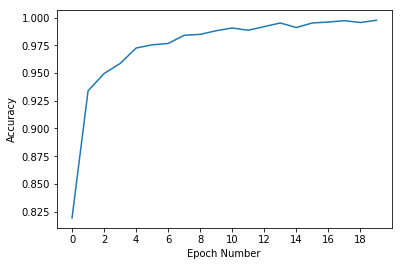

In [335]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch Number')
ax1.set_ylabel('Accuracy')
ax1.plot(range(20), accu)
plt.xticks(np.arange(0, 20, step=2))
plt.show()

In [346]:
tt = 0
t = 0
c_m = np.zeros((10,10))
for i in range(10):
    for j in (test_data[i]):
        res = test(j)
        tt+=1
        if(res == i):
            t+=1
            c_m[res][res]+=1
        else:
            c_m[res][i]+=1

In [339]:
print('Accurate Rate is:',t/tt)

Accurate Rate is: 0.9617117117117117


In [349]:
c_m

array([[ 36.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.],
       [  0.,  43.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.],
       [  0.,   0.,  37.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,  33.,   0.,   0.,   0.,   0.,   0.,   2.],
       [  0.,   0.,   0.,   0.,  56.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  58.,   0.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  42.,   0.,   0.,   0.],
       [  0.,   2.,   0.,   0.,   0.,   0.,   0.,  47.,   0.,   1.],
       [  0.,   0.,   3.,   0.,   2.,   0.,   0.,   0.,  38.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  37.]])

In [117]:
t_w = np.zeros((10,1024))
fill_random(t_w)

In [137]:
t_w

array([[ 67.,   4.,  91., ...,  39.,  63.,  44.],
       [ 62.,  61.,  32., ...,  10.,  87.,  51.],
       [ 97.,  83.,  55., ...,  48.,  39.,  93.],
       ..., 
       [  3.,  93.,  85., ...,  64.,  23.,  32.],
       [ 95.,  58.,  36., ...,  44.,   2.,  28.],
       [ 71.,  59.,  71., ...,  99.,  17.,  47.]])

In [288]:
ind_1 = random.randint(0,9)
ind_2 = random.randint(0,len(train_data[ind_1]))

242

In [ ]:
alpha = a0/(1+1*epoch)

In [ ]:
fill_random(weight)

Training curve: overall accuracy on the training set as a function of the epoch (i.e., complete pass through the training data). It's fine to show this in table form.
Overall accuracy on the test set.
Confusion matrix.

Learning rate decay function
===

In [319]:
epoch = 5
accu = []
weight = np.zeros((10,1025))
for num in range(epoch):
    print(num)
    total = 0
    r_t = 0
    for j in range(260):
        for i in range(10):
            if j<len(train_data[i]):
                r_t+=train(train_data[i][j],i,alpha=1/(1+1*epoch))
                total +=1    
    accu.append(r_t/total)

0
1
2
3
4


In [320]:
accu

[0.8394909688013136,
 0.9408866995073891,
 0.9560755336617406,
 0.9663382594417077,
 0.9614121510673235]

Bias vs. no bias
===

In [321]:
epoch = 5
accu = []
weight = np.zeros((10,1025))
for num in range(epoch):
    print(num)
    total = 0
    r_t = 0
    for j in range(260):
        for i in range(10):
            if j<len(train_data[i]):
                r_t+=train(train_data[i][j],i,w_bias=1)
                total +=1    
    accu.append(r_t/total)

0
1
2
3
4


In [322]:
accu

[0.8251231527093597,
 0.9334975369458128,
 0.9532019704433498,
 0.958128078817734,
 0.964696223316913]

Initialization of weights (zeros vs. random)
===

In [323]:
epoch = 5
accu = []
weight = np.zeros((10,1025))
fill_random(weight)
for num in range(epoch):
    print(num)
    total = 0
    r_t = 0
    for j in range(260):
        for i in range(10):
            if j<len(train_data[i]):
                r_t+=train(train_data[i][j],i,w_bias=1)
                total +=1    
    accu.append(r_t/total)

0
1
2
3
4


In [324]:
accu

[0.756568144499179,
 0.9064039408866995,
 0.9359605911330049,
 0.9552545155993432,
 0.9618226600985221]

Number of epochs.
===

In [325]:
epoch = 10
accu = []
weight = np.zeros((10,1025))
fill_random(weight)
for num in range(epoch):
    print(num)
    total = 0
    r_t = 0
    for j in range(260):
        for i in range(10):
            if j<len(train_data[i]):
                r_t+=train(train_data[i][j],i)
                total +=1    
    accu.append(r_t/total)

0
1
2
3
4
5
6
7
8
9


In [326]:
accu

[0.7869458128078818,
 0.9232348111658456,
 0.9441707717569786,
 0.9568965517241379,
 0.9655172413793104,
 0.9700328407224958,
 0.9749589490968801,
 0.9741379310344828,
 0.9860426929392446,
 0.9831691297208539]